## Analyse Caractéristiques et Lieux

In [ ]:
!pip install requests
!pip install os
!pip install matplotlib 
!pip install pandas
!pip install plotly
!pip install io
!pip install seaborn

### Importing packages

In [1]:
import requests
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import io
import seaborn as sns

### Importing database

In [2]:
# fonction de téléchargement des données sur les accidents corporels
def telecharge(url_data,filename, path):
    # Vérifie si le dossier 'data' existe, sinon le crée
    if not os.path.exists(path):
        os.makedirs(path)
    #télécharge les données avec l'url
    response = requests.get(url_data)
    if response.status_code == 200:
        file_path = os.path.join(path, filename)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Fichier {filename} téléchargé avec succès:{file_path}")
    else:
        print(f"Echec de téléchargement pour {filename}. Statut: {response.status_code}")

# API pour accéder à l'url de téléchargement
url_root="https://www.data.gouv.fr/api/1/datasets/53698f4ca3a729239d2036df/resources/"
urls={
    "usagers-2023.csv":"68848e2a-28dd-4efc-9d5f-d512f7dbe66f",
    "vehicules-2023.csv":"146a42f5-19f0-4b3e-a887-5cd8fbef057b",
    "lieux-2023.csv":"8bef19bf-a5e4-46b3-b5f9-a145da4686bc",
    "caract-2023.csv":"104dbb32-704f-4e99-a71e-43563cb604f2"
}
path='/home/onyxia/Projet-Python-pour-la-Data-Science/data'

for filename, resource_id in urls.items():
    url=url_root+resource_id
    response1=requests.get(url)
    if response1.status_code==200:
        data=response1.json()
        url_data=data['url']
    else:
        print("downloading failed")
    telecharge(url_data,filename,path)


Fichier usagers-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/usagers-2023.csv
Fichier vehicules-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/vehicules-2023.csv
Fichier lieux-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv
Fichier caract-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2023.csv


In [10]:
df_caract = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2023.csv", sep = ';')
df_caract.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


In [5]:
# Base des lieux 
df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')
df_lieux.head()

/tmp/ipykernel_18742/2020527371.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


In [6]:
catr_labels = {
    1: "Autoroute",
    2: "Route nationale",
    3: "Route départementale",
    4: "Voie communale",
    5: "Hors réseau public",
    6: "Parc de stationnement",
    7: "Routes de métropole urbaine",
    9: "Autre"
}

circ_labels = {
    -1: "Non renseigné",
    1: "À sens unique",
    2: "Bidirectionnelle",
    3: "À chaussées séparées",
    4: "Avec voies d’affectation variable"
}

vosp_labels = {
    -1: "Non renseigné",
    0: "Sans objet",
    1: "Piste cyclable",
    2: "Bande cyclable",
    3: "Voie réservée"
}

prof_labels = {
    -1: "Non renseigné",
    1: "Plat",
    2: "Pente",
    3: "Sommet de côte",
    4: "Bas de côte"
}

plan_labels = {
    -1: "Non renseigné",
    1: "Partie rectiligne",
    2: "En courbe à gauche",
    3: "En courbe à droite",
    4: "En 'S'"
}

surf_labels = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Mouillée",
    3: "Flaques",
    4: "Inondée",
    5: "Enneigée",
    6: "Boue",
    7: "Verglacée",
    8: "Corps gras – huile",
    9: "Autre"
}

infra_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Souterrain - tunnel",
    2: "Pont - autopont",
    3: "Bretelle d’échangeur",
    4: "Voie ferrée",
    5: "Carrefour aménagé",
    6: "Zone piétonne",
    7: "Zone de péage",
    8: "Chantier",
    9: "Autres"
}

situ_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Sur chaussée",
    2: "Sur bande d’arrêt d’urgence",
    3: "Sur accotement",
    4: "Sur trottoir",
    5: "Sur piste cyclable",
    6: "Sur autre voie spéciale",
    8: "Autres"
}


In [7]:
lum_labels = {
    1: "Plein jour",
    2: "Crépuscule ou aube",
    3: "Nuit sans éclairage public",
    4: "Nuit avec éclairage public non allumé",
    5: "Nuit avec éclairage public allumé"
}

agg_labels = {
    1: "Hors agglomération",
    2: "En agglomération"
}

int_labels = {
    1: "Hors intersection",
    2: "Intersection en X",
    3: "Intersection en T",
    4: "Intersection en Y",
    5: "Intersection à plus de 4 branches",
    6: "Giratoire",
    7: "Place",
    8: "Passage à niveau",
    9: "Autre intersection"
}

atm_labels = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Pluie légère",
    3: "Pluie forte",
    4: "Neige - grêle",
    5: "Brouillard - fumée",
    6: "Vent fort - tempête",
    7: "Temps éblouissant",
    8: "Temps couvert",
    9: "Autre"
}

col_labels = {
    -1: "Non renseigné",
    1: "Deux véhicules - frontale",
    2: "Deux véhicules – par l’arrière",
    3: "Deux véhicules – par le côté",
    4: "Trois véhicules et plus – en chaîne",
    5: "Trois véhicules et plus - collisions multiples",
    6: "Autre collision",
    7: "Sans collision"
}


### Analyses 

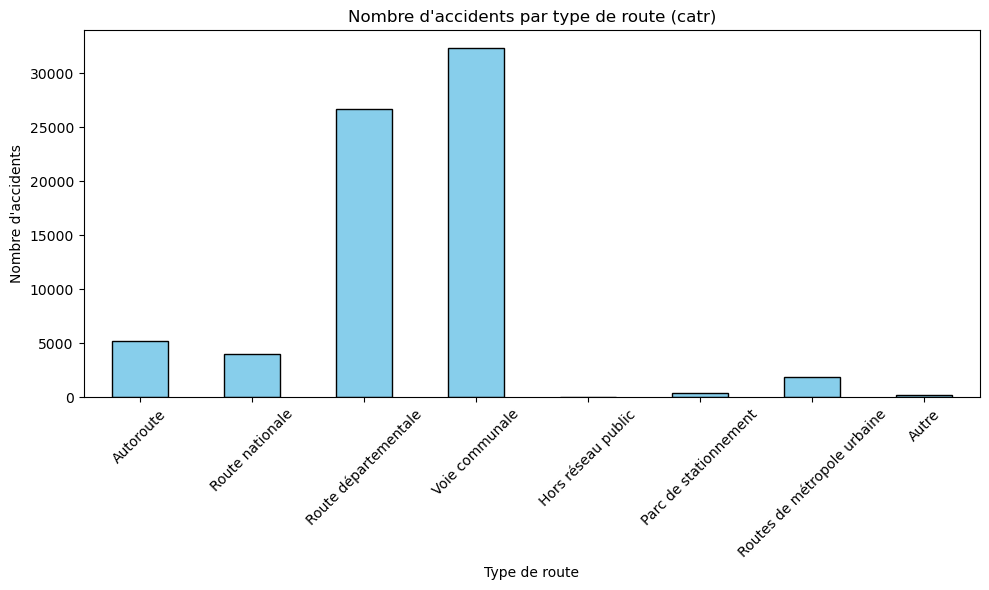

In [11]:
# Comptage des occurrences par catégorie de route
catr_counts = df_lieux['catr'].value_counts().sort_index()

# Remplacement des codes par les labels pour l'affichage
catr_counts.index = catr_counts.index.map(catr_labels)

# Création du diagramme
plt.figure(figsize=(10, 6))
catr_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Nombre d'accidents par type de route (catr)")
plt.xlabel("Type de route")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

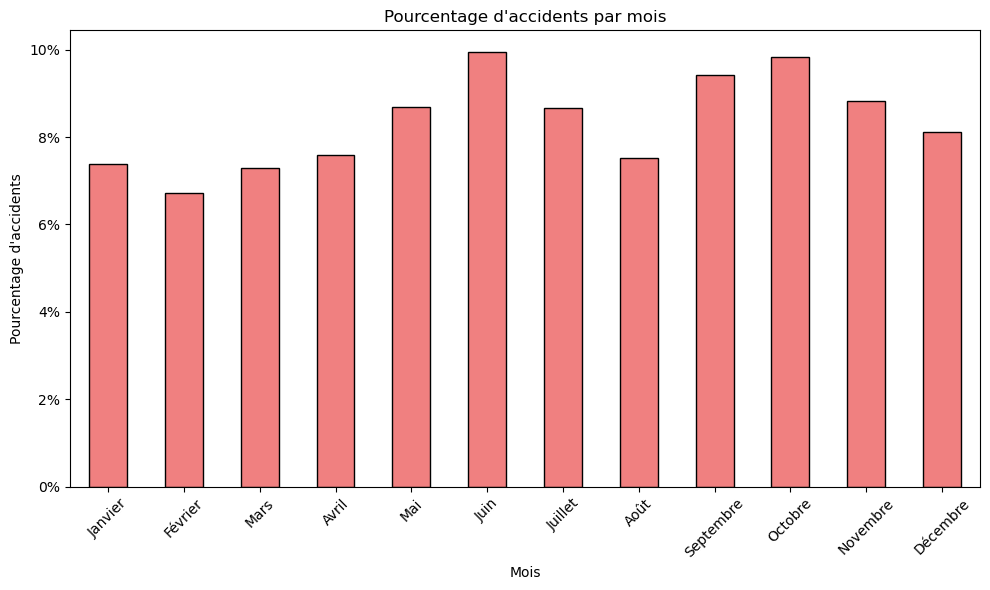

In [12]:
# Calcul des pourcentages d'accidents par mois
mois_counts = df_caract['mois'].value_counts(normalize=True).sort_index() * 100

# Création du diagramme avec pourcentages
plt.figure(figsize=(10, 6))
mois_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Pourcentage d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(ticks=range(len(mois_counts)), labels=[
    "Janvier", "Février", "Mars", "Avril", "Mai", "Juin", 
    "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"
], rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.tight_layout()

# Affichage du graphique
plt.show()

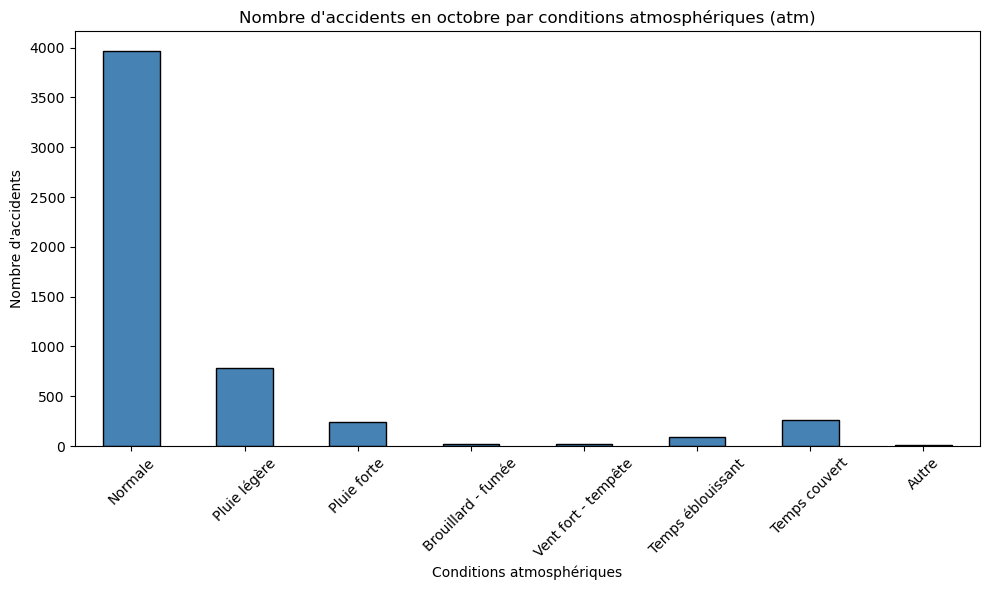

In [13]:
# Filtrer les données pour le mois d'octobre (mois = 10)
octobre_data = df_caract[df_caract['mois'] == 10]

# Croiser les accidents d'octobre avec les conditions atmosphériques (atm)
atm_counts = octobre_data['atm'].value_counts().sort_index()

# Remplacer les codes par leurs labels pour l'affichage
atm_counts.index = atm_counts.index.map(atm_labels)

# Création du diagramme
plt.figure(figsize=(10, 6))
atm_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Nombre d'accidents en octobre par conditions atmosphériques (atm)")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()